In [4]:
# TASK 3: CNN MODEL
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
# Load dataset
train_dir = '/content/drive/MyDrive/Task3 Dataset/Train'
val_dir = '/content/drive/MyDrive/Task3 Dataset/Valid'
test_dir = '/content/drive/MyDrive/Task3 Dataset/Test'

In [6]:
# Preprocessing
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_data = val_test_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = val_test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 360 images belonging to 3 classes.
Found 72 images belonging to 3 classes.
Found 168 images belonging to 3 classes.


In [7]:
# CNN MODEL
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.3674 - loss: 1.1728 - val_accuracy: 0.3333 - val_loss: 1.1121
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4094 - loss: 1.0850 - val_accuracy: 0.4028 - val_loss: 1.0852
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4682 - loss: 1.0409 - val_accuracy: 0.4444 - val_loss: 1.0360
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5511 - loss: 0.9366 - val_accuracy: 0.5278 - val_loss: 0.8910
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5556 - loss: 0.8802 - val_accuracy: 0.5556 - val_loss: 0.9916
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5781 - loss: 0.9171 - val_accuracy: 0.5972 - val_loss: 0.8506
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6420 - loss: 0.8169 - val_accuracy: 0.5278 - val_loss: 0.8750
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6434 - loss: 0.7825 - val_accuracy: 0.5972 - val_loss:

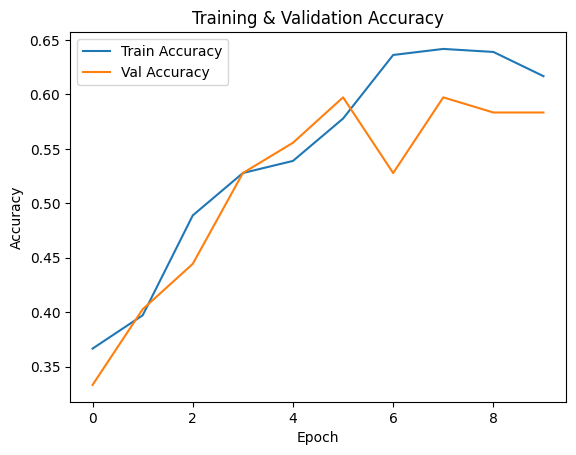

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6820 - loss: 0.8897
Test Accuracy: 0.61


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step
              precision    recall  f1-score   support

        Cats       0.63      0.68      0.66        56
        Cows       0.63      0.84      0.72        56
        Dogs       0.55      0.32      0.40        56

    accuracy                           0.61       168
   macro avg       0.60      0.61      0.59       168
weighted avg       0.60      0.61      0.59       168



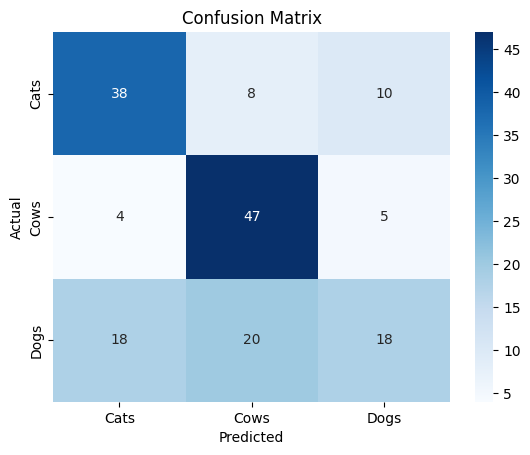

In [11]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()